# Analysis Notebook

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\naveen\OneDrive\Desktop\studentsPerformance(Dashboard)\data\students.csv")
df.head()


,student_id,name,class,comprehension,attention,focus,retention,engagement_time,assessment_score
0,1,Krishna Khan,7A,57.7,74.7,70.1,53.8,90,59.0
1,2,Ishaan Das,7B,82.6,54.4,40.7,56.3,86,52.4
2,3,Reyansh Das,7A,63.0,64.2,59.8,45.2,52,53.7
3,4,Shaurya Nair,7B,84.8,86.2,89.1,53.9,75,83.3
4,5,Reyansh Nair,6B,75.4,67.4,83.4,62.0,74,72.1


In [3]:
df[['comprehension','attention','focus','retention','engagement_time','assessment_score']].corr()


,comprehension,attention,focus,retention,engagement_time,assessment_score
comprehension,1.000000,0.423694,0.530521,0.600627,0.065921,0.745144
attention,0.423694,1.000000,0.168629,0.351093,0.321916,0.543333
focus,0.530521,0.168629,1.000000,0.481601,-0.218019,0.688045
retention,0.600627,0.351093,0.481601,1.000000,0.140894,0.583087
engagement_time,0.065921,0.321916,-0.218019,0.140894,1.000000,0.044712
assessment_score,0.745144,0.543333,0.688045,0.583087,0.044712,1.000000


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X = df[['comprehension','attention','focus','retention','engagement_time']]
y = df['assessment_score']

model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("MAE:", mean_absolute_error(y, y_pred))


Coefficients: [0.34145165 0.28008769 0.35058984 0.07306737 0.00697471]
Intercept: -4.741050358974299
MAE: 5.219073349110065


In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0, n_init=10).fit(
    df[['comprehension','attention','focus','retention']]
)

# Convert labels to Series so we can use .map()
df['persona'] = pd.Series(kmeans.labels_).map({
    0: 'Analytical',
    1: 'Balanced',
    2: 'Hands-on'
})

df[['student_id','name','class','persona']].head(10)


,student_id,name,class,persona
0,1,Krishna Khan,7A,Hands-on
1,2,Ishaan Das,7B,Hands-on
2,3,Reyansh Das,7A,Hands-on
3,4,Shaurya Nair,7B,Balanced
4,5,Reyansh Nair,6B,Balanced
5,6,Arjun Patel,7A,Analytical
6,7,Vihaan Gupta,6B,Balanced
7,8,Sai Das,6B,Analytical
8,9,Aarav Sharma,7A,Hands-on
9,10,Sai Gupta,6B,Hands-on


Matplotlib is building the font cache; this may take a moment.


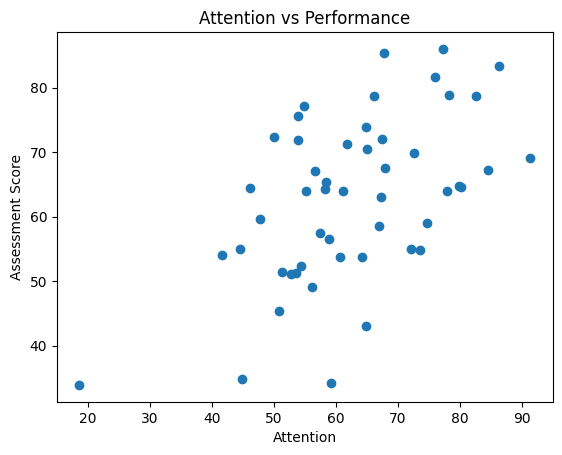

In [7]:
import matplotlib.pyplot as plt

plt.scatter(df['attention'], df['assessment_score'])
plt.xlabel("Attention")
plt.ylabel("Assessment Score")
plt.title("Attention vs Performance")
plt.show()
